In [37]:
import fidap, pandas as pd, importlib, numpy as np
importlib.reload(fidap)

<module 'fidap' from 'C:\\Users\\User\\Google Drive\\Python\\notebooks\\fidap.py'>

Let's first explore the data and find some basic numbers here.

In [38]:
df2 = fidap.sql("""
    select insider_trades.ticker, insider_trades.filingdate, insider_trades.transactionshares,
    insider_trades.transactionvalue, daily.close, daily.fc_1m, daily.marketcap
    from insider_trades, tickers, daily
    where 
    insider_trades.ticker = tickers.ticker and 
    insider_trades.ticker = daily.ticker and
    insider_trades.filingdate = daily.date and
    insider_trades.transactionvalue > 100000 and 
    insider_trades.securitytitle = 'Common Stock'
""")

In [39]:
df2.head()

,ticker,filingdate,transactionshares,transactionvalue,close,fc_1m,marketcap
0,AAPL,2015-01-02,-900.0,101961.0,27.332,0.093590,641191.2
1,AAPL,2015-01-02,-2904.0,327368.0,27.332,0.093590,641191.2
2,ABCO,2015-01-02,-28800.0,1411776.0,48.480,0.020008,1745.9
3,ABCO,2015-01-02,-30000.0,1494600.0,48.480,0.020008,1745.9
4,AZO,2015-01-02,516.0,319461.0,616.790,-0.024579,19674.2


In [40]:
len(df2)

320759

In [41]:
df2['mc_pct'] = df2['transactionvalue'] / (df2['marketcap']*1e6)

In [42]:
df2['sale'] = np.where(df2['transactionshares'] > 0, False, True)

In [43]:
df2

,ticker,filingdate,transactionshares,transactionvalue,close,fc_1m,marketcap,mc_pct,sale
0,AAPL,2015-01-02,-900.0,101961.0,27.332,0.093590,641191.2,1.590181e-07,True
1,AAPL,2015-01-02,-2904.0,327368.0,27.332,0.093590,641191.2,5.105622e-07,True
2,ABCO,2015-01-02,-28800.0,1411776.0,48.480,0.020008,1745.9,8.086236e-04,True
3,ABCO,2015-01-02,-30000.0,1494600.0,48.480,0.020008,1745.9,8.560628e-04,True
4,AZO,2015-01-02,516.0,319461.0,616.790,-0.024579,19674.2,1.623756e-05,False
...,...,...,...,...,...,...,...,...,...
320754,ONEM,2020-10-23,-15000.0,471195.0,31.910,NaN,4028.1,1.169770e-04,True
320755,PAG,2020-10-23,-8000.0,445040.0,55.130,NaN,4429.0,1.004832e-04,True
320756,SNBR,2020-10-23,-3376.0,208991.0,65.000,NaN,1802.1,1.159708e-04,True
320757,UTHR,2020-10-23,2500.0,159750.0,122.780,NaN,5452.9,2.929634e-05,False


In [44]:
df2 = df2.dropna()

In [45]:
features = ['close', 'marketcap', 'mc_pct', 'sale']
label = 'fc_1m'

In [46]:
import xgboost as xgb 

In [47]:
model = xgb.XGBRegressor()

In [48]:
model.fit(df2[features],df2[label])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [49]:
preds = model.predict(df2[features])

In [50]:
df2['predict'] = preds

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df2

,ticker,filingdate,transactionshares,transactionvalue,close,fc_1m,marketcap,mc_pct,sale,predict
0,AAPL,2015-01-02,-900.0,101961.0,27.332,0.093590,641191.2,1.590181e-07,True,0.051608
1,AAPL,2015-01-02,-2904.0,327368.0,27.332,0.093590,641191.2,5.105622e-07,True,0.051608
2,ABCO,2015-01-02,-28800.0,1411776.0,48.480,0.020008,1745.9,8.086236e-04,True,-0.041948
3,ABCO,2015-01-02,-30000.0,1494600.0,48.480,0.020008,1745.9,8.560628e-04,True,-0.041948
4,AZO,2015-01-02,516.0,319461.0,616.790,-0.024579,19674.2,1.623756e-05,False,0.024058
...,...,...,...,...,...,...,...,...,...,...
319544,RAPT,2020-09-23,-608000.0,18756800.0,28.610,0.153792,700.1,2.679160e-02,True,0.018588
319545,TA,2020-09-23,104738.0,2259199.0,17.560,0.606492,252.8,8.936705e-03,False,0.104502
319546,TA,2020-09-23,218577.0,3060078.0,17.560,0.606492,252.8,1.210474e-02,False,0.016674
319547,VER,2020-09-23,40000.0,253160.0,6.080,0.110197,6553.9,3.862738e-05,False,0.062403


In [52]:
df2[df2['predict'] > 0]['fc_1m'].mean()

0.02360703056933017

In [53]:
df2[df2['predict'] < 0]['fc_1m'].mean()

-0.03286466919910995

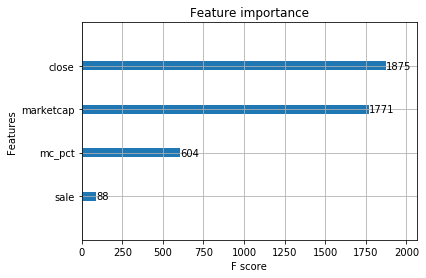

In [54]:
xgb.plot_importance(model)
